# Orders Cleaning:

**Scope of this notebook:**
<br>
To deal with the null values and feature engineering in order to conduct a proper EDA on the orders.

In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import requests

/Users/laurencewilliams/anaconda3/envs/bts36/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [8]:
ls

Appointment_Data_Clean.ipynb       Nigeria Blood Donations.ipynb
Blood_Donations_update_time.ipynb  Orders_Data_Clean.ipynb
Merge_Donors_Appointments.ipynb    Read_Me.md
Merged - Rough notebook.ipynb      orders_updated_29_03.csv


In [2]:
pwd

'/Users/laurencewilliams/BTS/Blood_Project/Data_Cleaning_Notebook:Scripts'

In [3]:
orders = pd.read_excel('/Users/laurencewilliams/BTS/Final_Project/GitHub_Repo_Files/orders.xlsx')

In [10]:
appt = pd.read_excel('/Users/laurencewilliams/BTS/Final_Project/GitHub_Repo_Files/donors.xlsx')
donors = pd.read_excel('/Users/laurencewilliams/BTS/Final_Project/GitHub_Repo_Files/donor_appointment .xlsx')

In [16]:
donors.isnull().sum()

Appointment ID         0
Appointment Date      14
Time                 294
Blood Bank/Center    490
Donor ID               0
City/Event           889
dtype: int64

In [17]:
donors.shape

(1519, 6)

### Part I: Decision on which ones to drop:

In [5]:
print("number of rows:", orders.shape[0])

number of rows: 7146


In [6]:
orders.isnull().sum()

Order ID                     0
Blood Type                   1
Geno Type                 6259
Blood                     6245
Hospital ID                  0
BloodBank ID                 0
Unix Time                    0
Cross Matching            1272
QTY                          0
Agent  ID                 6251
Dispatch ID                552
Address                      0
State                        1
End Point Geo-location    1773
dtype: int64

In [7]:
print("Percentage null out of total per variable:")
print("")
for i in orders.columns:
    print(f"{i}: {round(orders[i].isnull().sum()/orders.shape[0]*100, 2)}%")

Percentage null out of total per variable:

Order ID: 0.0%
Blood Type: 0.01%
Geno Type: 87.59%
Blood: 87.39%
Hospital ID: 0.0%
BloodBank ID: 0.0%
Unix Time: 0.0%
Cross Matching: 17.8%
QTY: 0.0%
Agent  ID: 87.48%
Dispatch ID: 7.72%
Address : 0.0%
State: 0.01%
End Point Geo-location: 24.81%


In [8]:
a = pd.DataFrame()
a['Variables'] = orders.columns
a['Total_observations'] = orders.shape[0]
a['Total_null'] = [orders[i].isnull().sum() for i in orders.columns]
a['Percentage_of_null'] = [str(round(orders[i].isnull().sum()/orders.shape[0]*100, 2))+'%' for i in orders.columns]

In [9]:
a

,Variables,Total_observations,Total_null,Percentage_of_null
0,Order ID,7146,0,0.0%
1,Blood Type,7146,1,0.01%
2,Geno Type,7146,6259,87.59%
3,Blood,7146,6245,87.39%
4,Hospital ID,7146,0,0.0%
5,BloodBank ID,7146,0,0.0%
6,Unix Time,7146,0,0.0%
7,Cross Matching,7146,1272,17.8%
8,QTY,7146,0,0.0%
9,Agent ID,7146,6251,87.48%


Decision to drop:
   * Geno Type
   * Blood
   * Agent ID

In [10]:
orders = orders.drop(['Geno Type'], axis = 1)
orders = orders.drop(['Blood'], axis =1)
orders = orders.drop(['Agent  ID'], axis =1)

In [11]:
orders.columns

Index(['Order ID', 'Blood Type', 'Hospital ID', 'BloodBank ID', 'Unix Time',
       'Cross Matching', 'QTY', 'Dispatch ID', 'Address ', 'State',
       'End Point Geo-location'],
      dtype='object')

### Part II: Feature Engineering

In [12]:
orders.isnull().sum()

Order ID                     0
Blood Type                   1
Hospital ID                  0
BloodBank ID                 0
Unix Time                    0
Cross Matching            1272
QTY                          0
Dispatch ID                552
Address                      0
State                        1
End Point Geo-location    1773
dtype: int64

**1. Blood:**

Text(0.5, 1.0, 'Blood Count Plot')

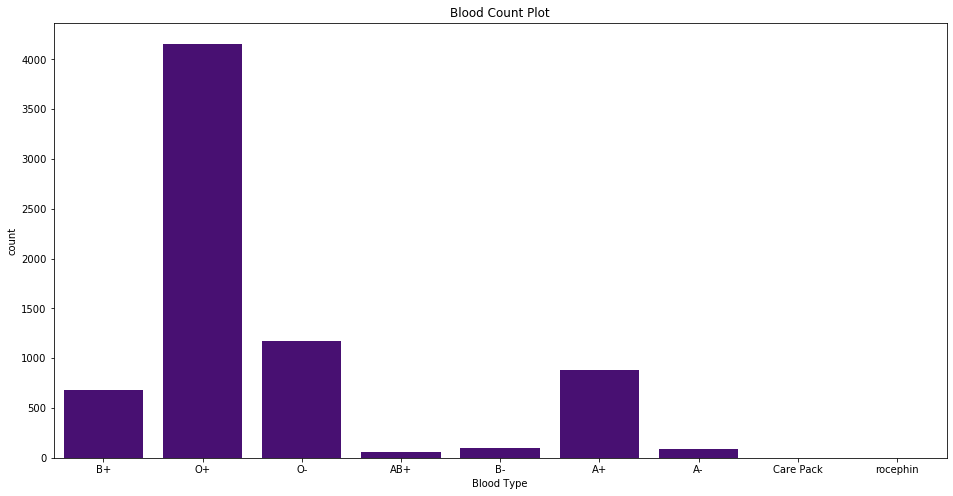

In [13]:
fig, ax = plt.subplots(1, figsize = (16,8))
sns.countplot(x = 'Blood Type', data = orders, color = 'Indigo', ax = ax)
ax.set_title('Blood Count Plot')

In [14]:
orders['Blood Type'].unique()

array(['B+', 'O+', 'O-', 'AB+', 'B-', 'A+', 'A-', 'Care Pack', 'rocephin',
       nan], dtype=object)

As only one missing value missing, will replace it with the mode:

In [15]:
orders.loc[(orders['Blood Type'].isnull()), 'Blood Type'] = 'O+'

**2. State:**

Text(0.5, 1.0, 'State Count Plot')

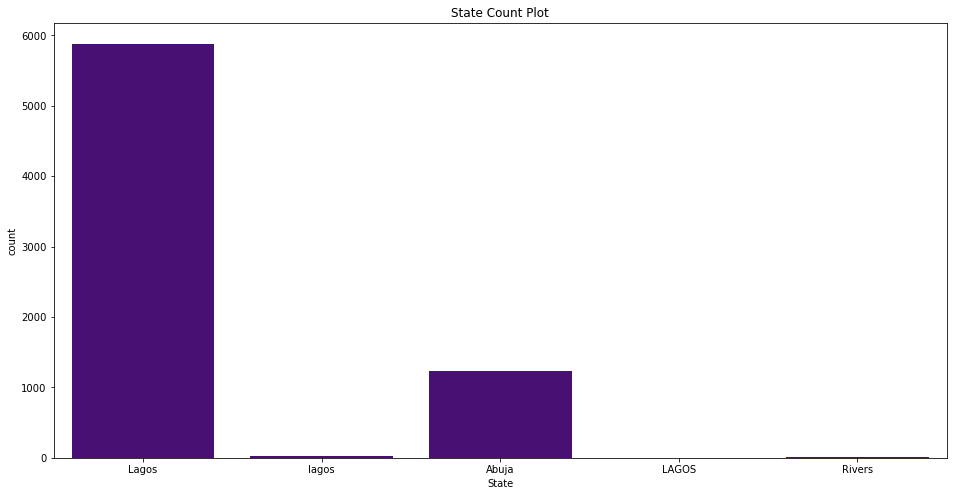

In [16]:
fig, ax = plt.subplots(1, figsize = (16,8))
sns.countplot(x = 'State', data = orders, color = 'Indigo', ax = ax)
ax.set_title('State Count Plot')

In [17]:
orders.loc[orders['State'].isnull()]

,Order ID,Blood Type,Hospital ID,BloodBank ID,Unix Time,Cross Matching,QTY,Dispatch ID,Address,State,End Point Geo-location
5226,6231,O-,7186423,1869734,1570718370,NaN,1,Monday,"2 Oshofisan street, Off Ijesha Road, itire, Su...",NaN,NaN


In [18]:
orders.loc[orders['State'].isnull()]['Address '].values[0]

'2 Oshofisan street, Off Ijesha Road, itire, Surulere, Lagos.'

As the address is in Lagos, we will add this State as Lagos:

In [19]:
orders.loc[(orders['State'].isnull()), 'State'] = 'Lagos'

However, we can also see some errors with different syntax for Lagos. We will replace this with 'Lagos':

In [20]:
orders['State'].unique()
#Note: 'Rivers' is a State in Nigeria

array(['Lagos', 'lagos', 'Abuja', 'LAGOS', 'Rivers'], dtype=object)

In [21]:
orders.loc[(orders['State'] == 'lagos'), 'State'] = 'Lagos'
orders.loc[(orders['State'] == 'LAGOS'), 'State'] = 'Lagos'

**3. Dispatch ID:**

In [22]:
orders['Dispatch ID'].unique()

array([nan, 'bike3', 'bike2', 'bike1', 'bike4', 'ABJ01', 'ABJ02', 'ABJ03',
       'bike5', 'Mohammed', 'bike6', 'bike7', 'Monday', 'bike9', 'bike10',
       'bike8', 'Michael', 'bike11', 'ph001', 'bike12'], dtype=object)

In [23]:
orders.loc[orders['Dispatch ID'] == 'ABJ01']

,Order ID,Blood Type,Hospital ID,BloodBank ID,Unix Time,Cross Matching,QTY,Dispatch ID,Address,State,End Point Geo-location
2181,2628,O-,3526018,8796015,1541681655,Yes,1,ABJ01,"Plot 1847, Constitution Avenue, Behind ICPC/ND...",Abuja,"9.0429923,7.467967"
2255,2708,A+,1439607,1628739,1542874550,Yes,1,ABJ01,"5, Juba Street, Zone 6 Wuse, Abuja",Abuja,NaN
2350,2807,O+,6071982,1628739,1544274051,Yes,1,ABJ01,"6 Djibouti Street, off Freetown Street, Wuse I...",Abuja,"9.0741669,7.4865957"
2384,2843,O-,4253019,6459238,1544786480,Yes,1,ABJ01,"CBN Road, FHA Lugbe Abuja",Abuja,NaN
2393,2852,O+,1263059,1245693,1544951566,Yes,1,ABJ01,"Tafawa Balewa Way Area 8, Garki, Abuja",Abuja,"9.0348838,7.4879229"
...,...,...,...,...,...,...,...,...,...,...,...
7104,8526,B+,6071982,793812,1584099953,false,1,ABJ01,"6 Djibouti Street, off Freetown Street, Wuse I...",Abuja,"9.0741669,7.4865957"
7110,8532,O+,6243150,793812,1584112558,false,1,ABJ01,Airport Road Jabi,Abuja,"8.9449941,7.2872218"
7132,8557,A+,651843,425397,1584281674,false,5,ABJ01,"5, Atom Kpera Close, Off Abdulmumini, Gudu, Abuja",Abuja,"9.0004812,7.4757986"
7133,8558,O-,1205489,793812,1584282146,false,1,ABJ01,"DIA Headquarters, after State House Clinic, As...",Abuja,"9.0871046,7.5210173"


Text(0.5, 1.0, 'Dispatch ID Count Plot')

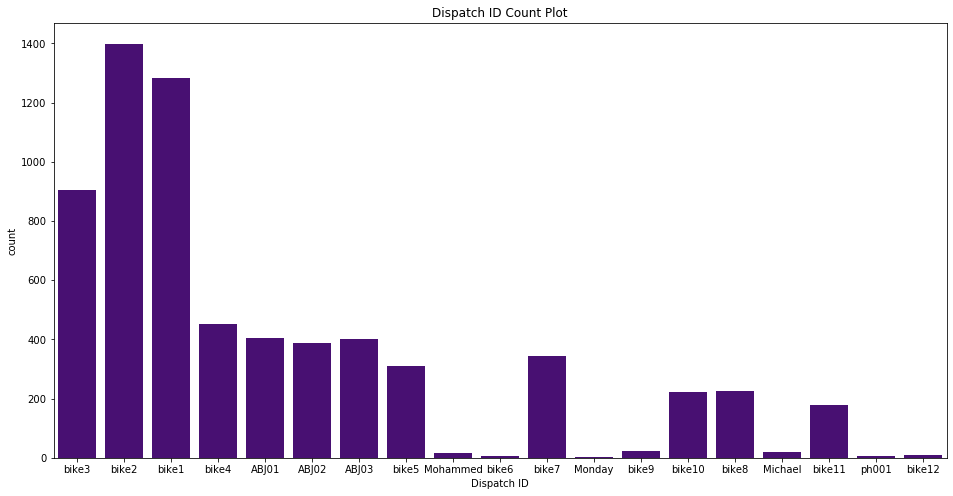

In [24]:
fig, ax = plt.subplots(1, figsize = (16,8))
sns.countplot(x = 'Dispatch ID', data = orders, color = 'Indigo', ax = ax)
ax.set_title('Dispatch ID Count Plot')

Not sure what ABJ.. for example means. It could, however, be useful if they have different types of dispatching - for example, whether it is by van or by car. However, I am not sure what to make of values such as 'Michael' (which clearly refers to an individual's name).
<br>
<br>
Here I suggest that we clarify with LifeBank in order to see what these values (that are not 'bike.' mean. From this we can do a classification by vehicle type which will be useful for our analyisis.
<br>
<br>
For now, however, I will drop this column.

In [25]:
orders = orders.drop(['Dispatch ID'], axis = 1)

In [26]:
orders.isnull().sum()

Order ID                     0
Blood Type                   0
Hospital ID                  0
BloodBank ID                 0
Unix Time                    0
Cross Matching            1272
QTY                          0
Address                      0
State                        0
End Point Geo-location    1773
dtype: int64

**4. Cross Matching:**

In transfusion medicine, cross-matching or crossmatching (part of series of steps in blood compatibility tests) is testing before a blood transfusion to determine if the donor's blood is compatible with the blood of an intended recipient. Cross-matching is also used to determine compatibility between a donor and recipient in organ transplantation. Compatibility is determined through matching of different blood group systems, the most important of which are the ABO and Rh system, and/or by directly testing for the presence of antibodies against the antigens in a sample of donor blood or other tissue.
<br>
<br>
Intuitively, it would seem that Cross Matching is to be related with the Blood Type.

In [27]:
orders.head()

,Order ID,Blood Type,Hospital ID,BloodBank ID,Unix Time,Cross Matching,QTY,Address,State,End Point Geo-location
0,1,B+,2154730,1,1466034200,NaN,5,"Military Hospital, Igbogbi, Lagos",Lagos,"6.5224642,3.3734771"
1,2,O+,1250873,1,1466726300,NaN,1,"General Hospital Road, Araromi, Gbagada, Lagos",Lagos,NaN
2,3,O+,9215804,2104756,1472048755,No,5,12 Idowu Martins Street Victoria Island,Lagos,"6.4332852,3.420224"
3,4,O+,6873095,0,1469059200,NaN,2,"28, david ogundele street, olude compound b/stop",Lagos,NaN
4,5,O+,1890375,0,1469059201,NaN,2,"155, Akowonjo Road, Opposite Four Square Gospe...",Lagos,NaN


In [28]:
orders['Cross Matching'].unique()

array([nan, 'No', 'no', 'Yes', 'false', 'true'], dtype=object)

Firstly, let us group together 'No', 'no', 'false' and then 'Yes' and 'true':

In [29]:
#No
orders.loc[(orders['Cross Matching'] == 'no'), 'Cross Matching'] = 'No'
orders.loc[(orders['Cross Matching'] == 'false'), 'Cross Matching'] = 'No'

#Yes
orders.loc[(orders['Cross Matching'] == 'true'), 'Cross Matching'] = 'Yes'

In [30]:
orders.loc[orders['Cross Matching'] == 'Yes'].shape[0]

4260

Yes:4260 | No: 1614


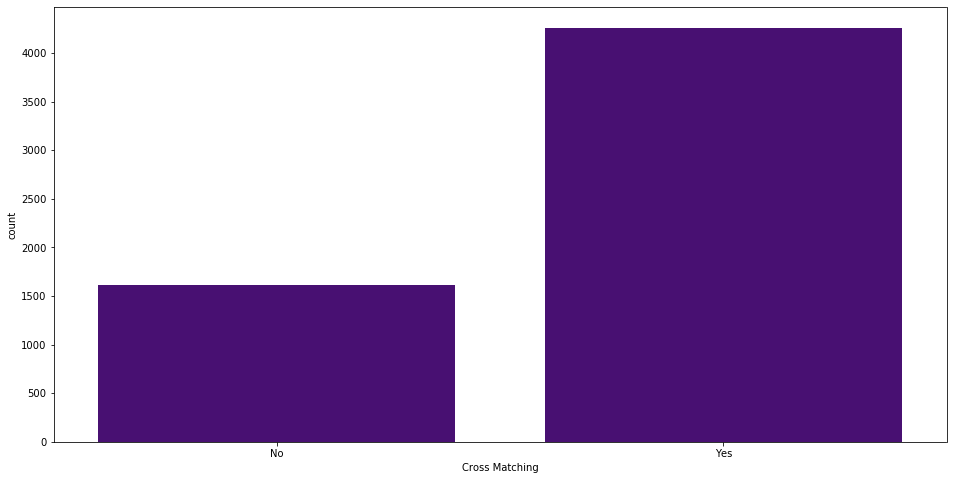

In [31]:
fig, ax = plt.subplots(1, figsize = (16,8))
sns.countplot(x = 'Cross Matching', data = orders, color = 'Indigo', ax = ax)
print(f"Yes:{orders.loc[orders['Cross Matching'] == 'Yes'].shape[0]} | \
No: {orders.loc[orders['Cross Matching'] == 'No'].shape[0]}")

We can see in general that most cases are Yes (Yes 4260 vs No: 1614). However, let's try and see if there is a relationship between the cases of null values.

In [32]:
crossmatch_null = orders[orders['Cross Matching'].isnull()] 

Text(0.5, 1.0, 'Blood Type Count Plot for Cross Matching Null Cases')

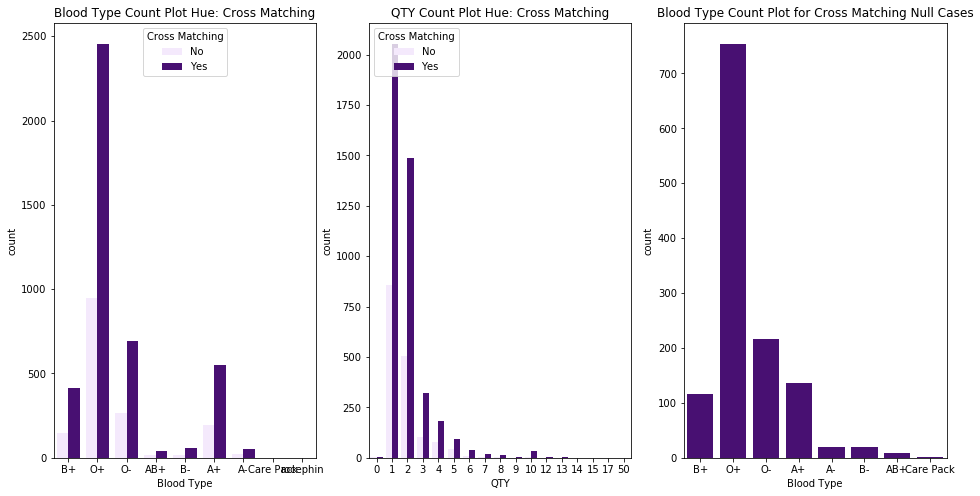

In [33]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize = (16,8))
sns.countplot(x = 'Blood Type', data = orders, color = 'Indigo', hue = 'Cross Matching', ax = ax[0])
ax[0].set_title('Blood Type Count Plot Hue: Cross Matching')
sns.countplot(x = 'QTY', data = orders, color = 'Indigo', hue = 'Cross Matching', ax = ax[1])
ax[1].set_title('QTY Count Plot Hue: Cross Matching')
sns.countplot(x = 'Blood Type', data = crossmatch_null, color = 'Indigo', ax = ax[2])
ax[2].set_title('Blood Type Count Plot for Cross Matching Null Cases')

We can see the following:
1. Via Blood Type, via different Quantities, is 'Yes' for cross-matching
2. The major blood type amongst the null cases is still O+ which is expected.

Given this, I will simply replace it with the most frequent (i.e. 'Yes')
(This, however, is a simplistic strategy and there is room for improvement later on).

In [34]:
orders.loc[(orders['Cross Matching'].isnull()), 'Cross Matching'] = 'Yes'

In [35]:
orders.isnull().sum()

Order ID                     0
Blood Type                   0
Hospital ID                  0
BloodBank ID                 0
Unix Time                    0
Cross Matching               0
QTY                          0
Address                      0
State                        0
End Point Geo-location    1773
dtype: int64

**5. End Point Geo-location:**

Thee end point geo_location is the end point; address is the address version of this; however this means that we cannot get the distance from point to point. The only thing might be if we get the blood bank ID - to consider this later.

In [36]:
orders.loc[orders['End Point Geo-location'].isnull()].head()

,Order ID,Blood Type,Hospital ID,BloodBank ID,Unix Time,Cross Matching,QTY,Address,State,End Point Geo-location
1,2,O+,1250873,1,1466726300,Yes,1,"General Hospital Road, Araromi, Gbagada, Lagos",Lagos,NaN
3,4,O+,6873095,0,1469059200,Yes,2,"28, david ogundele street, olude compound b/stop",Lagos,NaN
4,5,O+,1890375,0,1469059201,Yes,2,"155, Akowonjo Road, Opposite Four Square Gospe...",Lagos,NaN
6,7,O+,8205469,2104756,1467331200,No,1,"1, Akin-Delu Street of Cole Street. Ikate",Lagos,NaN
7,8,O+,6873095,2104756,1468627200,No,1,"28, david ogundele street, olude compound b/stop",Lagos,NaN


In [37]:
def return_coordinates(address):
    
    GOOGLE_MAPS_API_URL = 'https://maps.googleapis.com/maps/api/geocode/json'
    api_key = "##################"
    params = {
            'address': address,
            'sensor': 'false',
            'region': 'nigeria',
            'key': api_key
        }
    req = requests.get(GOOGLE_MAPS_API_URL, params=params)
    res = req.json()
    result = res['results'][0]
    lat = result['geometry']['location']['lat']
    long = result['geometry']['location']['lng']
    return str(lat) + ',' + str(long)

In [ ]:
address_list = []
end_point_list = []
for i in address_list:
    try:
        end_point_list.append(return_coordinates(i))
    except Exception as e:
        end_point_list.append(f"error: {e}")

In [38]:
test = orders.loc[orders['End Point Geo-location'].isnull()]['Address '][7]

In [39]:
return_coordinates(test)

'6.610150699999999,3.2571244'

In [40]:
geo_null = orders.loc[orders['End Point Geo-location'].isnull()]
geo_null = geo_null.reset_index(drop=True)

In [41]:
order_id_list = geo_null['Order ID'].to_list()
address_list = geo_null['Address '].to_list()
geo_null.head()

,Order ID,Blood Type,Hospital ID,BloodBank ID,Unix Time,Cross Matching,QTY,Address,State,End Point Geo-location
0,2,O+,1250873,1,1466726300,Yes,1,"General Hospital Road, Araromi, Gbagada, Lagos",Lagos,NaN
1,4,O+,6873095,0,1469059200,Yes,2,"28, david ogundele street, olude compound b/stop",Lagos,NaN
2,5,O+,1890375,0,1469059201,Yes,2,"155, Akowonjo Road, Opposite Four Square Gospe...",Lagos,NaN
3,7,O+,8205469,2104756,1467331200,No,1,"1, Akin-Delu Street of Cole Street. Ikate",Lagos,NaN
4,8,O+,6873095,2104756,1468627200,No,1,"28, david ogundele street, olude compound b/stop",Lagos,NaN


We will loop through a quarter of the address list because of requests time out:

In [42]:
order_id_list1 = order_id_list[:450]
order_id_list2 = order_id_list[450:900]
order_id_list3 = order_id_list[900:1350]
order_id_list4 = order_id_list[1350:]

address_list1 = address_list[:450]
address_list2 = address_list[450:900]
address_list3 = address_list[900:1350]
address_list4 = address_list[1350:]

end_point_list1 = []
end_point_list2 = []
end_point_list3 = []
end_point_list4 = []

In [43]:
geo_null.loc[geo_null['Order ID'] == 719]

,Order ID,Blood Type,Hospital ID,BloodBank ID,Unix Time,Cross Matching,QTY,Address,State,End Point Geo-location
226,719,O+,6812475,73549,1499426645,Yes,2,"1 - 3 Broad St, Odan,",Lagos,NaN


In [44]:
for i in address_list1:
    try:
        end_point_list1.append(return_coordinates(i))
    except Exception as e:
        end_point_list1.append(f"error: {e}")

KeyboardInterrupt: 

In [ ]:
for i in address_list2:
    try:
        end_point_list2.append(return_coordinates(i))
    except Exception as e:
        end_point_list2.append(f"error: {e}")

In [ ]:
for i in address_list3:
    try:
        end_point_list3.append(return_coordinates(i))
    except Exception as e:
        end_point_list3.append(f"error: {e}")

In [ ]:
for i in address_list4:
    try:
        end_point_list4.append(return_coordinates(i))
    except Exception as e:
        end_point_list4.append(f"error: {e}")

In [76]:
order_id_list_final = order_id_list1 + order_id_list2 + order_id_list3 + order_id_list4
end_point_list_final = end_point_list1 + end_point_list2 + end_point_list3 + end_point_list4

In [77]:
print(len(order_id_list_final), len(end_point_list_final))

1773 1773


In [80]:
for i in range(len(end_point_list_final)):
    orders.loc[(orders['Order ID'] == order_id_list_final[i]), 'End Point Geo-location'] = end_point_list_final[i]

In [81]:
orders.isnull().sum()

Order ID                  0
Blood Type                0
Hospital ID               0
BloodBank ID              0
Unix Time                 0
Cross Matching            0
QTY                       0
Address                   0
State                     0
End Point Geo-location    0
dtype: int64

However, we still have cases where the geolocation have errors because of incorrect address, let's see:

In [90]:
error_idx = []
for i, j in enumerate(orders['End Point Geo-location']):
    if j.startswith('error'):
        error_idx.append(i)
print("error indexes for geolocation:", error_idx)

error indexes for geolocation: [583, 1424, 1830, 2064, 2456, 2458, 3919, 3952, 3954, 3977, 4022, 4097, 4122, 4277, 4326, 4336, 4746, 4765, 4796, 4893, 4895, 4912, 5163, 6013, 6014, 6047, 6267, 6327, 6358, 6392, 6406, 6899]


In [93]:
orders[orders.index.isin(error_idx)]

,Order ID,Blood Type,Hospital ID,BloodBank ID,Unix Time,Cross Matching,QTY,Address,State,End Point Geo-location
583,719,O+,6812475,73549,1499426645,Yes,2,"1 - 3 Broad St, Odan,",Lagos,error: list index out of range
1424,1720,O+,781394,7921508,1526475079,No,1,"1, Akindele Street, Gbagada.",Lagos,"error: ('Connection aborted.', OSError(""(54, '..."
1830,2219,O-,6812475,7921508,1535285521,Yes,2,"1 - 3 Broad St, Odan,",Lagos,error: list index out of range
2064,2493,O+,6812475,7921508,1539797156,Yes,1,"1 - 3 Broad St, Odan,",Lagos,error: list index out of range
2456,2918,O+,6812475,7921508,1546102217,Yes,2,"1 - 3 Broad St, Odan,",Lagos,error: list index out of range
2458,2920,O+,6812475,7921508,1546116655,Yes,2,"1 - 3 Broad St, Odan,",Lagos,error: list index out of range
3919,4626,O+,6812475,6540732,1559895876,Yes,1,"1 - 3 Broad St, Odan,",Lagos,error: list index out of range
3952,4665,O+,6812475,6528941,1560267943,Yes,1,"1 - 3 Broad St, Odan,",Lagos,error: list index out of range
3954,4667,O+,6812475,7921508,1560273210,Yes,2,"1 - 3 Broad St, Odan,",Lagos,error: list index out of range
3977,4690,A+,1437605,6540732,1560432977,Yes,1,"3, Ade-adenaike Street, Irawo Bus stop Owode, ...",Lagos,error: list index out of range


In [108]:
print(orders[orders.index.isin(error_idx)]['Address '].unique())
print("total unique list of incorrect places:", len(orders[orders.index.isin(error_idx)]['Address '].unique()))

['1 - 3 Broad St, Odan,' '1, Akindele Street, Gbagada.'
 '3, Ade-adenaike Street, Irawo Bus stop Owode, Ajegunle.'
 '38 Cotonou Crescent Zone 6, Wuse, Abuja.'
 'last gate, opposite market, after police station, karimo'
 'IDU/KARMO Opposite Furniture Market' 'Block Industry Kurudu'
 '5 Imam Thani Street']
total unique list of incorrect places: 8


Let's first sort out the connection error ones:

In [100]:
#1, Akindele Street, Gbagada.
orders.loc[(orders['Address '] == '1, Akindele Street, Gbagada.'), 'End Point Geo-location'] = return_coordinates('1, Akindele Street, Gbagada.')

#38 Cotonou Crescent Zone 6, Wuse, Abuja
orders.loc[(orders['Address '] == '38 Cotonou Crescent Zone 6, Wuse, Abuja.'), 'End Point Geo-location'] = return_coordinates('38 Cotonou Crescent Zone 6, Wuse, Abuja.')

Now the rest manually fill in from Google Map Search:

In [110]:
#'1 - 3 Broad St, Odan,'
orders.loc[(orders['Address '] == '1 - 3 Broad St, Odan,'), 'End Point Geo-location'] = '6.453957,3.389601'

#3, Ade-adenaike Street, Irawo Bus stop Owode, Ajegunle.
#not sure what this is from Google Maps therefore will drop this
orders = orders[orders['Address '] != '3, Ade-adenaike Street, Irawo Bus stop Owode, Ajegunle.']

#'last gate, opposite market, after police station, karimo'
#not sure what this is from Google Maps therefore will drop this
orders = orders[orders['Address '] != 'last gate, opposite market, after police station, karimo']

#'IDU/KARMO Opposite Furniture Market'
#not sure what this is from Google Maps therefore will drop this
orders = orders[orders['Address '] != 'IDU/KARMO Opposite Furniture Market']

#'Block Industry Kurudu'
#not sure what this is from Google Maps therefore will drop this
orders = orders[orders['Address '] != 'Block Industry Kurudu']

#'5 Imam Thani Street'
orders.loc[(orders['Address '] == '5 Imam Thani Street'), 'End Point Geo-location'] = '6.493762,3.349031'

orders = orders.reset_index(drop=True)

In [112]:
error_idx = []
for i, j in enumerate(orders['End Point Geo-location']):
    if j.startswith('error'):
        error_idx.append(i)
if len(error_idx) == 0:
    print("there are no more geo errors")
else:
    print("there are still geo errors")

there are no more geo errors


In [177]:
orders.isnull().sum()

Order ID                  0
Blood Type                0
Hospital ID               0
BloodBank ID              0
Unix Time                 0
Cross Matching            0
QTY                       0
Address                   0
State                     0
End Point Geo-location    0
dtype: int64

In [118]:
orders.to_csv('orders_clean.csv', index=False)

In [120]:
pd.read_csv('orders_clean.csv').head()

,Order ID,Blood Type,Hospital ID,BloodBank ID,Unix Time,Cross Matching,QTY,Address,State,End Point Geo-location
0,1,B+,2154730,1,1466034200,Yes,5,"Military Hospital, Igbogbi, Lagos",Lagos,"6.5224642,3.3734771"
1,2,O+,1250873,1,1466726300,Yes,1,"General Hospital Road, Araromi, Gbagada, Lagos",Lagos,"6.5529208,3.3880537"
2,3,O+,9215804,2104756,1472048755,No,5,12 Idowu Martins Street Victoria Island,Lagos,"6.4332852,3.420224"
3,4,O+,6873095,0,1469059200,Yes,2,"28, david ogundele street, olude compound b/stop",Lagos,"6.610150699999999,3.2571244"
4,5,O+,1890375,0,1469059201,Yes,2,"155, Akowonjo Road, Opposite Four Square Gospe...",Lagos,"6.602106699999999,3.3055263"


## Part II: Checking and Updating Geo, adding new columns, etc.:

Now that we have cleaned the data, we can now improve it by making it more geo-friendly. I will create a geometry column with the POINT(long, lat) so it can be visualised in python, but also a separate lat, long coordinate list so that it can be visualised in Tableau.

**Lat, Long Coords:**

In [179]:
orders = pd.read_csv('orders_clean.csv')

In [184]:
orders['End Point Geo-location'] = orders['End Point Geo-location'].astype(str)

In [188]:
lat = []
long = []
for i in orders['End Point Geo-location'].to_list():
    a  = i.split(',')
    lat.append(float(a[0]))
    long.append(float(a[1]))
orders['lat'] = lat
orders['long'] = long

In [189]:
orders.head()

,Order ID,Blood Type,Hospital ID,BloodBank ID,Unix Time,Cross Matching,QTY,Address,State,End Point Geo-location,lat,long
0,1,B+,2154730,1,1466034200,Yes,5,"Military Hospital, Igbogbi, Lagos",Lagos,"6.5224642,3.3734771",6.522464,3.373477
1,2,O+,1250873,1,1466726300,Yes,1,"General Hospital Road, Araromi, Gbagada, Lagos",Lagos,"6.5529208,3.3880537",6.552921,3.388054
2,3,O+,9215804,2104756,1472048755,No,5,12 Idowu Martins Street Victoria Island,Lagos,"6.4332852,3.420224",6.433285,3.420224
3,4,O+,6873095,0,1469059200,Yes,2,"28, david ogundele street, olude compound b/stop",Lagos,"6.610150699999999,3.2571244",6.610151,3.257124
4,5,O+,1890375,0,1469059201,Yes,2,"155, Akowonjo Road, Opposite Four Square Gospe...",Lagos,"6.602106699999999,3.3055263",6.602107,3.305526


In [190]:
orders.to_csv('orders_final.csv')